# Практическая работа №13

## Задание 1

Загрузить данные `Market_Basket_Optimisation.csv`.


In [1]:
import pandas as pd

mb_opt = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
mb_opt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 2

Визуализировать данные `Market_Basket_Optimisation.csv`, а именно отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров.


Относительная частота встречаемости:


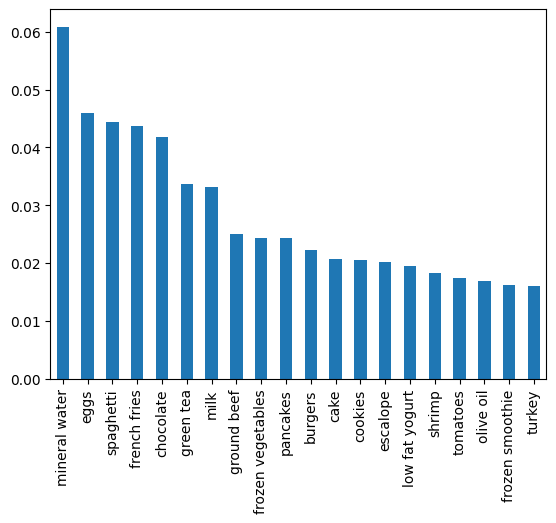

In [2]:
mb_opt.stack().value_counts(normalize=True).head(20).plot(kind='bar')

print("Относительная частота встречаемости:")

Фактическая частота встречаемости:


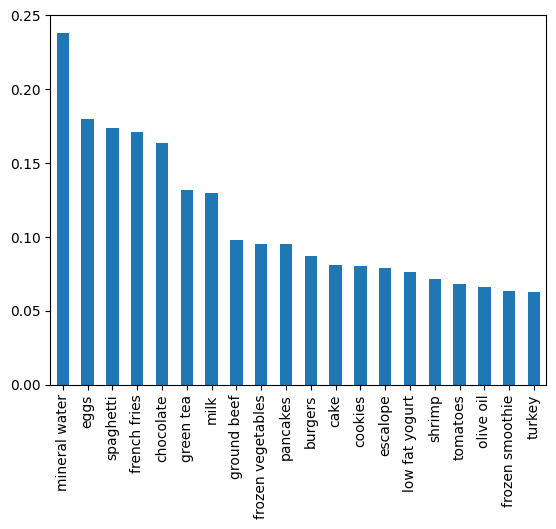

In [3]:
mb_opt.stack().value_counts().apply(lambda item: item / mb_opt.shape[0]).head(20).plot(kind='bar')

print("Фактическая частота встречаемости:")

## Подготовка к проведению расчетов

In [4]:
libs = [
    "apriori_python", "apyori",
    "efficient_apriori", "fpgrowth_py",
]
dsets = ["mb_opt", "data"]

In [5]:
times = pd.DataFrame(
    data={dsets[0]: [pd.NA], dsets[1]: [pd.NA]},
    index=pd.Index(data=libs, name="Библиотека"),
)
times

,mb_opt,data
Библиотека,,
apriori_python,<NA>,<NA>
apyori,<NA>,<NA>
efficient_apriori,<NA>,<NA>
fpgrowth_py,<NA>,<NA>


In [6]:
import time


def time_for(dset, lib):
    def decorator(func):
        def wrapper(*args, **kwargs):
            t = time.perf_counter()
            result = func(*args, **kwargs)
            times.at[lib, dset] = time.perf_counter() - t
            return result

        return wrapper

    return decorator

## Задание 3

Применить алгоритм Apriori, используя 3 разные библиотеки (`apriori_python`, `apyori`, `efficient_apriori`)
для данных `Market_Basket_Optimisation.csv`.


In [7]:
mb_opt_minConf = 0.0
mb_opt_minSup = 0.038

mb_opt_list = [
    mb_opt.iloc[i].dropna().tolist()
    for i in range(mb_opt.shape[0])
]
mb_opt_list

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [8]:
from apriori_python import apriori as apr1


@time_for('mb_opt', 'apriori_python')
def mb_opt_apr1():
    return apr1(
        itemSetList=mb_opt_list,
        minConf=mb_opt_minConf,
        minSup=mb_opt_minSup,
    )


_, rules = mb_opt_apr1()

rules

[[{'mineral water'}, {'ground beef'}, 0.17170022371364654],
 [{'mineral water'}, {'milk'}, 0.20134228187919462],
 [{'mineral water'}, {'eggs'}, 0.21364653243847875],
 [{'mineral water'}, {'chocolate'}, 0.220917225950783],
 [{'spaghetti'}, {'ground beef'}, 0.225114854517611],
 [{'spaghetti'}, {'chocolate'}, 0.225114854517611],
 [{'chocolate'}, {'spaghetti'}, 0.23921887713588283],
 [{'mineral water'}, {'spaghetti'}, 0.2505592841163311],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'spaghetti'}, 0.3989145183175034],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [9]:
from apyori import apriori as apr2


@time_for('mb_opt', 'apyori')
def mb_opt_apr2():
    return apr2(
        min_lift=1.0001,
        transactions=mb_opt_list,
        min_support=mb_opt_minSup,
        min_confidence=mb_opt_minConf,
    )


rules = list(mb_opt_apr2())
for rule in rules:
    for subset in rule[2]:
        x, = subset[0]
        y, = subset[1]
        print(
            f"{{{x}}} -> {{{y}}} "
            f"(conf: {subset[2]:.3}, "
            f"supp: {rule[1]:.3}, "
            f"lift: {subset[3]:.3})")


{chocolate} -> {mineral water} (conf: 0.321, supp: 0.0527, lift: 1.35)
{mineral water} -> {chocolate} (conf: 0.221, supp: 0.0527, lift: 1.35)
{chocolate} -> {spaghetti} (conf: 0.239, supp: 0.0392, lift: 1.37)
{spaghetti} -> {chocolate} (conf: 0.225, supp: 0.0392, lift: 1.37)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.0509, lift: 1.19)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.0509, lift: 1.19)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.0409, lift: 1.75)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.0409, lift: 1.75)
{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.0392, lift: 2.29)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.0392, lift: 2.29)
{milk} -> {mineral water} (conf: 0.37, supp: 0.048, lift: 1.55)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.55)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.0597, lift: 1.44)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.0597, lift: 1.44)


In [10]:
from efficient_apriori import apriori as apr3


@time_for('mb_opt', 'efficient_apriori')
def mb_opt_apr3():
    return apr3(
        transactions=mb_opt_list,
        min_support=mb_opt_minSup,
        min_confidence=mb_opt_minConf,
    )


_, rules = mb_opt_apr3()

for i in range(len(rules)):
    print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.348, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.348, conv: 1.122)
{spaghetti} -> {chocolate} (conf: 0.225, supp: 0.039, lift: 1.374, conv: 1.079)
{chocolate} -> {spaghetti} (conf: 0.239, supp: 0.039, lift: 1.374, conv: 1.086)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mine

## Задание 4

Применить алгоритм FP-Growth из библиотеки `fpgrowth_py` для данных `Market_Basket_Optimisation.csv`.


In [11]:
from fpgrowth_py import fpgrowth


@time_for('mb_opt', 'fpgrowth_py')
def mb_opt_fpgr():
    return fpgrowth(
        itemSetList=mb_opt_list,
        minConf=mb_opt_minConf,
        minSupRatio=mb_opt_minSup,
    )


_, rules = mb_opt_fpgr()

rules

[[{'spaghetti'}, {'ground beef'}, 0.225114854517611],
 [{'ground beef'}, {'spaghetti'}, 0.3989145183175034],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326],
 [{'mineral water'}, {'ground beef'}, 0.17170022371364654],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'mineral water'}, {'milk'}, 0.20134228187919462],
 [{'spaghetti'}, {'chocolate'}, 0.225114854517611],
 [{'chocolate'}, {'spaghetti'}, 0.23921887713588283],
 [{'mineral water'}, {'chocolate'}, 0.220917225950783],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'mineral water'}, {'spaghetti'}, 0.2505592841163311],
 [{'mineral water'}, {'eggs'}, 0.21364653243847875],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743]]

## Задание 5

Сравнить время выполнения всех алгоритмов и построить гистограмму для данных `Market_Basket_Optimisation.csv`.


In [12]:
times['mb_opt']

Библиотека
apriori_python       1.153604
apyori               0.000003
efficient_apriori     0.02196
fpgrowth_py          0.248783
Name: mb_opt, dtype: object

Гистограмма времен выполнения алгоритмов дляданных `Market_Basket_Optimisation.csv` размера (7501, 20)


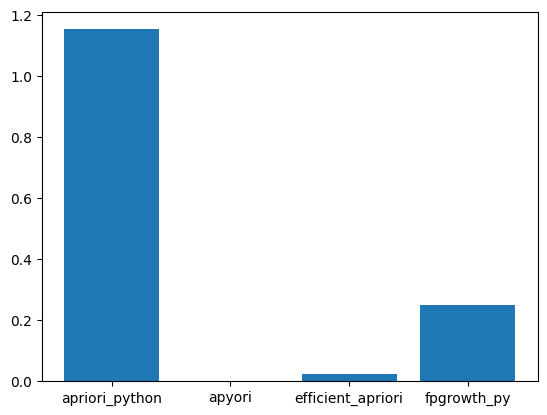

In [13]:
import matplotlib.pyplot as plt

plt.bar(libs, times['mb_opt'].tolist())
print(f"Гистограмма времен выполнения алгоритмов для"
      f"данных `Market_Basket_Optimisation.csv` размера {mb_opt.shape}")

## Задание 6

Загрузить данные `data.csv`.


In [14]:
import pandas as pd

data = pd.read_csv('data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9526,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9529,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 7

Визуализировать данные `data.csv`, а именно отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров.


Относительная частота встречаемости:


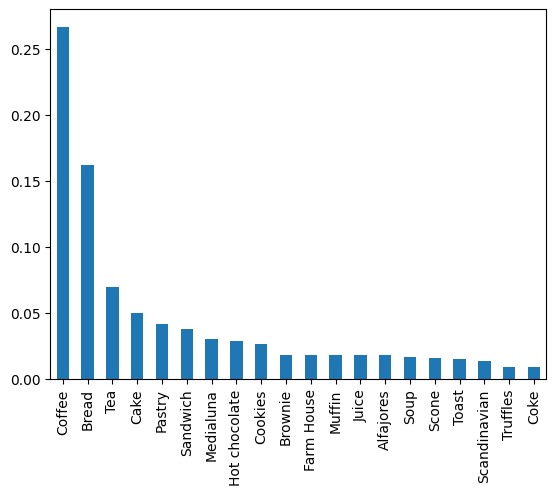

In [15]:
data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

print("Относительная частота встречаемости:")

Фактическая частота встречаемости:


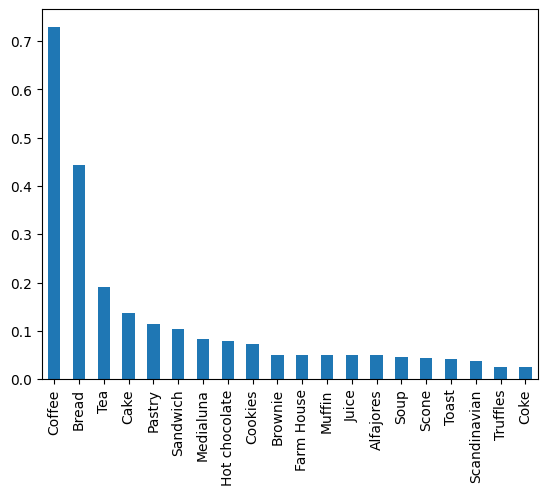

In [16]:
data.stack().value_counts().apply(lambda item: item / mb_opt.shape[0]).head(20).plot(kind='bar')

print("Фактическая частота встречаемости:")

## Задание 8

Применить алгоритм Apriori, используя 3 разные библиотеки (`apriori_python`, `apyori`, `efficient_apriori`)
для данных `data.csv`.


In [17]:
data_minConf = 0.1
data_minSup = 0.025

data_list = [
    data.iloc[i].dropna().tolist()
    for i in range(data.shape[0])
]
data_list

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [18]:
from apriori_python import apriori as apr1


@time_for('data', 'apriori_python')
def data_apr1():
    return apr1(
        itemSetList=data_list,
        minConf=data_minConf,
        minSup=data_minSup,
    )


_, rules = data_apr1()

rules

[[{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Tea'}, {'Bread'}, 0.19703703703703704],
 [{'Bread'}, {'Coffee'}, 0.27510494026477234],
 [{'Pastry'}, {'Bread'}, 0.33865030674846625],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942],
 [{'Cookies'}, {'Coffee'}, 0.5184466019417475],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692]]

In [19]:
from apyori import apriori as apr2


@time_for('data', 'apyori')
def data_apr2():
    return apr2(
        min_lift=1.0001,
        transactions=data_list,
        min_support=data_minSup,
        min_confidence=data_minConf,
    )


rules = list(data_apr2())
for rule in rules:
    for subset in rule[2]:
        x, = subset[0]
        y, = subset[1]
        print(
            f"{{{x}}} -> {{{y}}} "
            f"(conf: {subset[2]:.3}, "
            f"supp: {rule[1]:.3}, "
            f"lift: {subset[3]:.3})")


{Pastry} -> {Bread} (conf: 0.339, supp: 0.029, lift: 1.04)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.0543, lift: 1.11)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.0543, lift: 1.11)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.09)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.0294, lift: 1.07)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.0349, lift: 1.2)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.0472, lift: 1.16)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.12)


In [20]:
from efficient_apriori import apriori as apr3


@time_for('data', 'efficient_apriori')
def data_apr3():
    return apr3(
        transactions=data_list,
        min_support=data_minSup,
        min_confidence=data_minConf,
    )


_, rules = data_apr3()

for i in range(len(rules)):
    print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Pastry} -> {Bread} (conf: 0.339, supp: 0.029, lift: 1.042, conv: 1.021)
{Tea} -> {Bread} (conf: 0.197, supp: 0.028, lift: 0.606, conv: 0.841)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.219)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.121, conv: 1.122)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Coffee} -> {Tea} (conf: 0.104, supp: 0.050, lift: 0.736, conv: 0.958)


## Задание 9

Применить алгоритм FP-Growth из библиотеки `fpgrowth_py` для данных `data.csv`.


In [21]:
from fpgrowth_py import fpgrowth


@time_for('data', 'fpgrowth_py')
def data_fpgr():
    return fpgrowth(
        itemSetList=data_list,
        minConf=data_minConf,
        minSupRatio=data_minSup,
    )


_, rules = data_fpgr()

rules

[[{'Toast'}, {'Coffee'}, 0.7044025157232704],
 [{'Juice'}, {'Coffee'}, 0.5342465753424658],
 [{'Alfajores'}, {'Coffee'}, 0.5406976744186046],
 [{'Cookies'}, {'Coffee'}, 0.5184466019417475],
 [{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Bread'}, 0.33865030674846625],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Cake'}, {'Bread'}, 0.22482197355035605],
 [{'Cake'}, {'Tea'}, 0.2288911495422177],
 [{'Tea'}, {'Cake'}, 0.16666666666666666],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Tea'}, {'Bread'}, 0.19703703703703704],
 [{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.27510494026477234]]

## Задание 10

Сравнить время выполнения всех алгоритмов и построить гистограмму для данных `data.csv`.


In [22]:
times['data']

Библиотека
apriori_python       0.472312
apyori               0.000002
efficient_apriori    0.008478
fpgrowth_py          0.217884
Name: data, dtype: object

Гистограмма времен выполнения алгоритмов для данных `data.csv` размера (9531, 12)


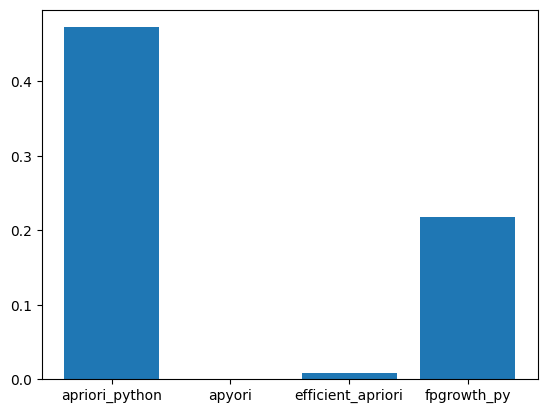

In [24]:
import matplotlib.pyplot as plt

plt.bar(libs, times['data'].tolist())
print(f"Гистограмма времен выполнения алгоритмов "
      f"для данных `data.csv` размера {data.shape}")